In [1]:
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline


In [2]:
df_all = pd.read_csv('baseA_real.csv', encoding='gbk')
df_all.head()

,监测时间,地点,SO2监测浓度(μg/m?),NO2监测浓度(μg/m?),PM10监测浓度(μg/m?),PM2.5监测浓度(μg/m?),O3监测浓度(μg/m?),CO监测浓度(mg/m?),温度(℃),湿度(%),气压(MBar),风速(m/s),风向(°)
0,2019/4/16 0:00,监测点A,5,75,61,38,1,1,21.1,89,1013,1.2,346.5
1,2019/4/16 1:00,监测点A,5,64,60,41,25,0.8,20.4,92,1012.4,1.1,18
2,2019/4/16 2:00,监测点A,4,60,36,40,25,0.8,20,93,1011.3,1.1,65.9
3,2019/4/16 3:00,监测点A,4,39,35,33,41,0.7,19.8,93,1010.4,1.5,78.4
4,2019/4/16 4:00,监测点A,4,39,28,39,36,0.8,19.9,92,1010,1.5,73.5


In [3]:
df_all.describe()

,监测时间,地点,SO2监测浓度(μg/m?),NO2监测浓度(μg/m?),PM10监测浓度(μg/m?),PM2.5监测浓度(μg/m?),O3监测浓度(μg/m?),CO监测浓度(mg/m?),温度(℃),湿度(%),气压(MBar),风速(m/s),风向(°)
count,19432,19432,19432,19432,19432,19432,19432,19432,19432,19432,19432,19432,19432
unique,19432,1,43,179,197,138,301,24,321,87,345,50,2937
top,2019/4/16 0:00,监测点A,6,16,28,7,0,0.6,26.8,78,1006.6,1.2,—
freq,1,19432,3075,613,416,715,1121,3942,196,584,146,1206,44


In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19432 entries, 0 to 19431
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   监测时间              19432 non-null  object
 1   地点                19432 non-null  object
 2   SO2监测浓度(μg/m?)    19432 non-null  object
 3   NO2监测浓度(μg/m?)    19432 non-null  object
 4   PM10监测浓度(μg/m?)   19432 non-null  object
 5   PM2.5监测浓度(μg/m?)  19432 non-null  object
 6   O3监测浓度(μg/m?)     19432 non-null  object
 7   CO监测浓度(mg/m?)     19432 non-null  object
 8   温度(℃)             19432 non-null  object
 9   湿度(%)             19432 non-null  object
 10  气压(MBar)          19432 non-null  object
 11  风速(m/s)           19432 non-null  object
 12  风向(°)             19432 non-null  object
dtypes: object(13)
memory usage: 1.9+ MB


In [5]:
df_all.columns = ['time', 'place', 'SO2', 'NO2', 'PM10', 'PM2.5', 'O3', 'CO', 'temp', 'humidity', 'air_press', 'wind_speed', 'wind_direction']
df_all['time'] = pd.to_datetime(df_all['time'])
for column_numeric in ['SO2', 'NO2', 'PM10', 'PM2.5', 'O3', 'CO', 'temp', 'humidity', 'air_press', 'wind_speed', 'wind_direction']:
    df_all[column_numeric] = pd.to_numeric(df_all[column_numeric], errors='coerce')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19432 entries, 0 to 19431
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            19432 non-null  datetime64[ns]
 1   place           19432 non-null  object        
 2   SO2             19215 non-null  float64       
 3   NO2             19212 non-null  float64       
 4   PM10            19131 non-null  float64       
 5   PM2.5           19255 non-null  float64       
 6   O3              19199 non-null  float64       
 7   CO              19218 non-null  float64       
 8   temp            19388 non-null  float64       
 9   humidity        19388 non-null  float64       
 10  air_press       19388 non-null  float64       
 11  wind_speed      19388 non-null  float64       
 12  wind_direction  19388 non-null  float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 1.9+ MB


<AxesSubplot:>

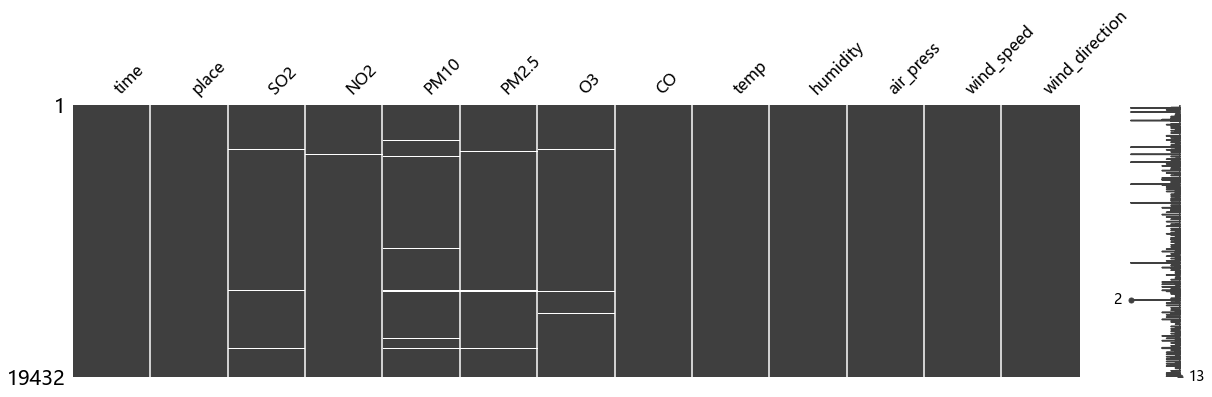

In [6]:
# 查看缺失值
missingno.matrix(df_all, figsize = (20,5))

In [7]:
# 将负数置为零
df_numeric = df_all[['SO2', 'NO2', 'PM10', 'PM2.5', 'O3', 'CO', 'temp', 'humidity', 'air_press', 'wind_speed', 'wind_direction']]
df_numeric[df_numeric<0] = 0
df_all[['SO2', 'NO2', 'PM10', 'PM2.5', 'O3', 'CO', 'temp', 'humidity', 'air_press', 'wind_speed', 'wind_direction']] = df_numeric

# 对缺失值进行填充处理
df_all = df_all.fillna(method='pad')

In [10]:
# 计算每小时的aqi
df_pollutant = df_all[['SO2', 'NO2', 'PM10', 'PM2.5', 'O3', 'CO']]
df_pollutant.head()
# 指标字典
dictR = {'IAQI': [0, 50, 100, 150, 200, 300, 400, 500],
         'CO': [0, 2, 4, 14, 24, 36, 48, 60],
         'SO2': [0, 50, 150, 475, 800, 1600, 2100, 2620],
         'NO2': [0, 40, 80, 180, 280, 565, 750, 940],
         'O3': [0, 100, 160, 215, 265, 800, 800, 800],
         'PM10': [0, 50, 150, 250, 350, 420, 500, 600],
         'PM2.5': [0, 35, 75, 115, 150, 250, 350, 500]}
def get_IAQI(df_pollutant):
    IAQI = []
    result = []
    argMax = []
    for row in range(len(df_pollutant)):
        IAQI.clear()
        for column in df_pollutant.columns:
            target = df_pollutant.iloc[row][column]

    #       将当前污染物值插入至对应的污染物浓度限值表中进行排序，得出每个污染物值相近的高位值和低位值BPH和BPL，以及其对应的IAQIH和IAQIL
            dictR[column].insert(0,target)
            dictR[column].sort()

            bph_index = dictR[column].index(target)#高位值对应下标
            bpl_index = dictR[column].index(target) - 1#低位值对应下标

            dictR[column].remove(target)

            BPH = dictR[column][bph_index]
            BPL = dictR[column][bpl_index]

            IAQIH = dictR['IAQI'][bph_index]
            IAQIL = dictR['IAQI'][bpl_index]

            IAQI_column = ((np.array(IAQIH) - np.array(IAQIL)) * (target - np.array(BPL)) / (np.array(BPH) - np.array(BPL))) + np.array(IAQIL)
            IAQI_column = np.around(np.array(IAQI_column))
            IAQI.append(IAQI_column)
            
        row_result = max(IAQI)
        iaqi = np.array(IAQI).argmax()
        result.append(row_result)
        argMax.append(iaqi)
        
    return  result
df_all['IAQI'] = get_IAQI(df_pollutant)

In [11]:
IAQI_diff = np.array(df_all['IAQI'].iloc[1:]) - np.array(df_all['IAQI'].iloc[0:-1])
IAQI_diff = np.append(IAQI_diff, 0)
df_all['IAQI_diff'] = IAQI_diff
# df_all.to_csv('df_all.csv', ',', encoding='gbk')

In [14]:
# 使用聚类对气象因子进行分类
from sklearn.cluster import KMeans
df_weather = df_all[['temp', 'humidity', 'air_press', 'wind_speed', 'wind_direction']]
# df_weather = df_all[['IAQI', 'IAQI_diff']]
types_weather4 = KMeans(n_clusters=4, random_state=9).fit_predict(df_weather)
types_weather5 = KMeans(n_clusters=5, random_state=9).fit_predict(df_weather)
types_weather3 = KMeans(n_clusters=3, random_state=9).fit_predict(df_weather)

# 使用calinski-Harabasz Index 评估的聚类分数
from sklearn import metrics
score_weather4 = metrics.calinski_harabasz_score(df_weather, types_weather4)
score_weather5 = metrics.calinski_harabasz_score(df_weather, types_weather5)
score_weather3 = metrics.calinski_harabasz_score(df_weather, types_weather3)
print('kmeans-4:', score_weather4)
print('kmeans-5:', score_weather5)
print('kmeans-3:', score_weather3)
df_all['types'] = types_weather5
df_all.head(10)

kmeans-4: 128555.80643762987
kmeans-5: 123669.44601834686
kmeans-3: 97753.81499724538


,time,place,SO2,NO2,PM10,PM2.5,O3,CO,temp,humidity,air_press,wind_speed,wind_direction,IAQI,IAQI_diff,types
0,2019-04-16 00:00:00,监测点A,5.0,75.0,61.0,38.0,1.0,1.0,21.1,89.0,1013.0,1.2,346.5,94.0,-14.0,1
1,2019-04-16 01:00:00,监测点A,5.0,64.0,60.0,41.0,25.0,0.8,20.4,92.0,1012.4,1.1,18.0,80.0,-5.0,3
2,2019-04-16 02:00:00,监测点A,4.0,60.0,36.0,40.0,25.0,0.8,20.0,93.0,1011.3,1.1,65.9,75.0,-26.0,0
3,2019-04-16 03:00:00,监测点A,4.0,39.0,35.0,33.0,41.0,0.7,19.8,93.0,1010.4,1.5,78.4,49.0,6.0,0
4,2019-04-16 04:00:00,监测点A,4.0,39.0,28.0,39.0,36.0,0.8,19.9,92.0,1010.0,1.5,73.5,55.0,0.0,0
5,2019-04-16 05:00:00,监测点A,4.0,42.0,34.0,39.0,32.0,0.8,20.0,92.0,1010.0,1.9,76.5,55.0,1.0,0
6,2019-04-16 06:00:00,监测点A,5.0,38.0,41.0,40.0,38.0,0.7,20.2,89.0,1010.3,1.3,125.6,56.0,10.0,4
7,2019-04-16 07:00:00,监测点A,6.0,49.0,38.0,48.0,26.0,0.7,20.2,90.0,1011.5,1.2,9.8,66.0,5.0,3
8,2019-04-16 08:00:00,监测点A,5.0,57.0,31.0,42.0,23.0,0.8,20.0,92.0,1012.7,1.9,356.7,71.0,1.0,1
9,2019-04-16 09:00:00,监测点A,5.0,58.0,11.0,33.0,20.0,0.8,19.7,92.0,1013.1,1.8,20.6,72.0,-10.0,3


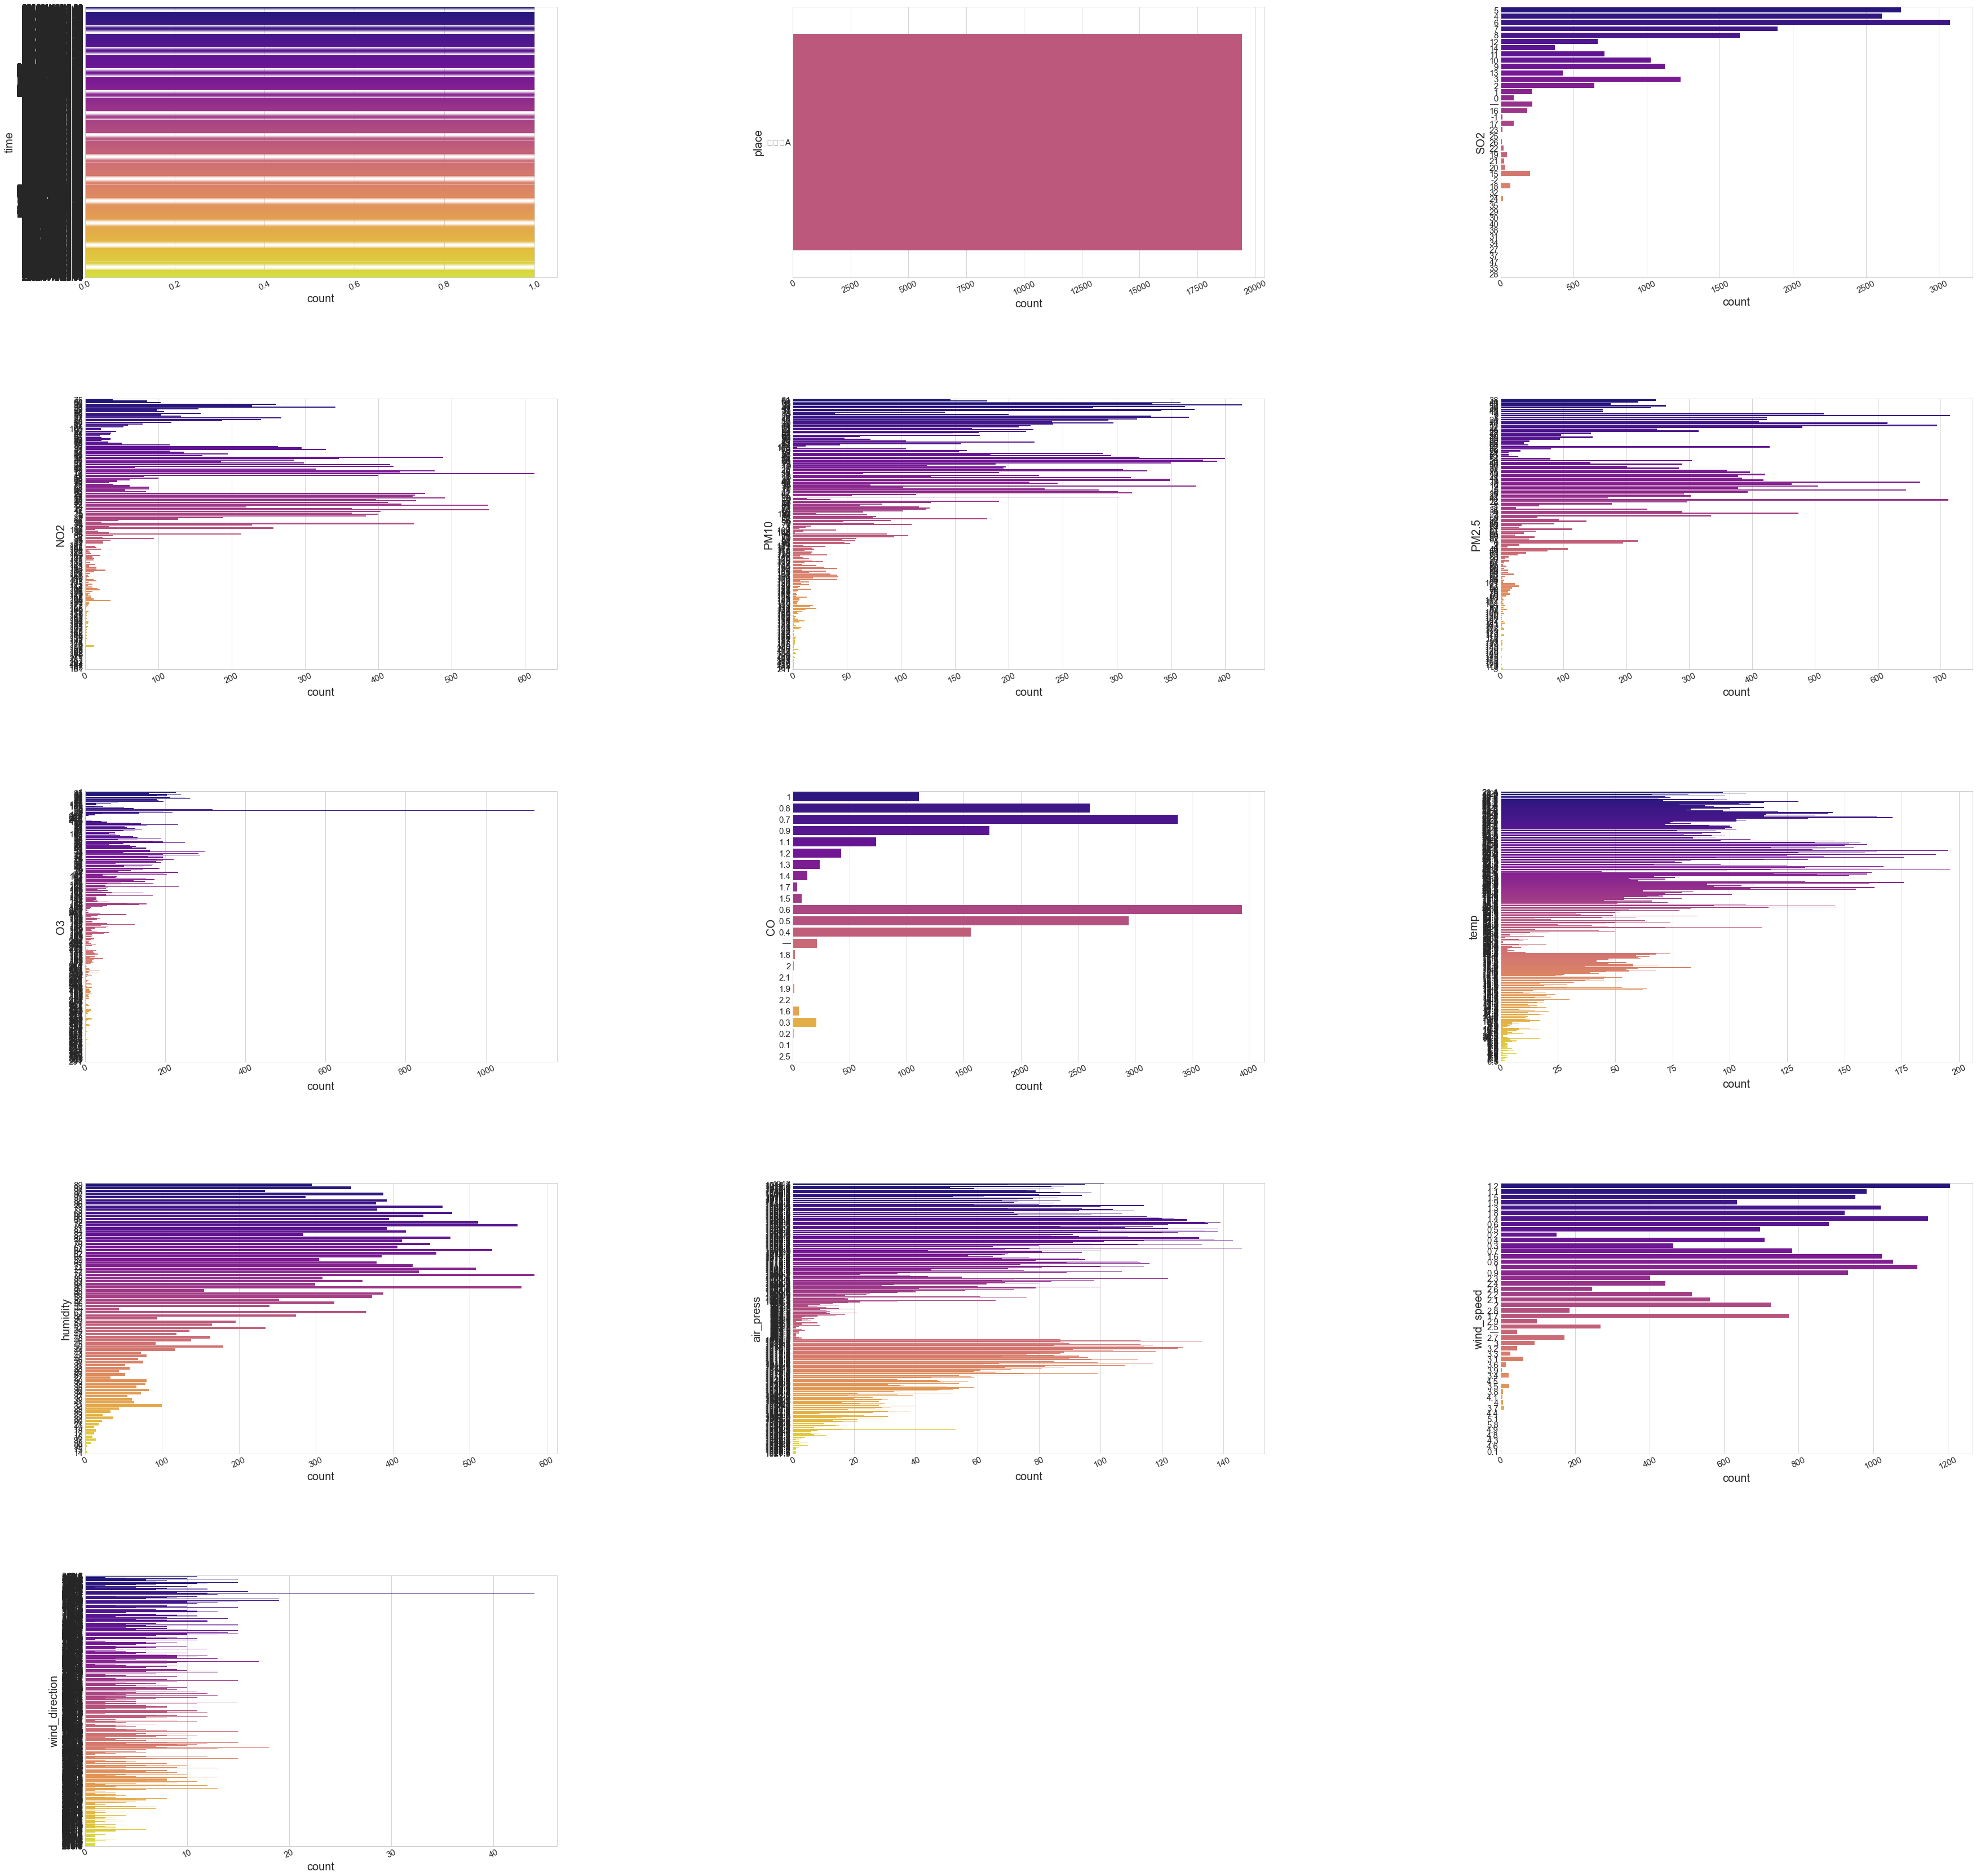

In [7]:
import math
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)

    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        #ax.set_title(column)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('',fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset,palette='plasma')
            plt.xticks(rotation=25)
        else:
            #直方图，频数
            
            g = sns.distplot(dataset[column],kde_kws={'bw': 0.1})
            plt.ylabel(ylabel='Density',fontsize=20)
            plt.xticks(rotation=25)
            
    
plot_distribution(df_all[['time', 'place', 'SO2', 'NO2', 'PM10', 'PM2.5', 'O3', 'CO', 'temp', 'humidity', 'air_press', 'wind_speed', 'wind_direction']], cols=3, width=60, height=60, hspace=0.45, wspace=0.5)